# BrickPredict - Preisvorhersage von LEGO-Sets

Legosteine erfreuen sich grosser Beliebtheit bei Jung und Alt. Während der Marktführer aus Dänemark versucht seine vorherschende Position zu halten, drängen immmer mehr alternative Anbieter auf den Markt. Zudem hat sich ein vitaler Markt von Sammlern etabliert, bei dem historische Lego-Sets zum Teil mit grossen Preissteigerungen verkauft werden. Im Zeitraum von 1987 bis 2015 haben Lego Sets eine jährliche Preissteigerung von min. 11% erfahren (Dobrynskaya und Kishilova 2022). In anderen Worten: In gewissen Kreisen konnten sich Lego Sets als "alternative Anlageklasse" etablieren. Sie wurden von einem jungen Start-Up engagiert, Preisempfehlungen für neue Lego-Sets basierend auf linearer Regression abzugeben, um im diesem aufstrebenden Markt neue Services anzubieten.

Bevor Sie starten, möchten Sie sich zunächst einen Überblick über verschiedene Sets am Markt verschaffen. Aus diesem Grund wurde ein erster Datensatz von verschiedenen Online-Plattformen (z.B. [rebrickable](https://rebrickable.com/), [bricklink](https://www.bricklink.com/v2/main.page)) gescrapt und mit auf ebay erzielten Marktpreisen in USD kombiniert.

Credits: Adrian Pandjaitan, Daniel Zuyev, Lucas Decrinis, Maximilian Gutt-Will, Valentin Maria Kranz (Scrapen, Datenaufbereitung und Projektidee)

# 1) Lesen Sie das Datenset "lego_sets_unclean.csv" ein!

In [4]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

lego = pd.read_csv("/content/lego_sets_unclean.csv")
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277,4.0,Catapult into action and take back the eggs fr...,75823,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168,4.0,Launch a flying attack and rescue the eggs fro...,75822,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74,4.3,Chase the piggy with lightning-fast Chuck and ...,75821,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032,3.6,Explore the architecture of the United States ...,21030,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


## 1a) Welche Datentypen sind vorhanden? Was ist der Unterschied zwischen diesen?

In [5]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  int64  
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.3+ MB


Das Datenset beinhaltet Floats, Integers und Objects.

Floats: Sind Dezimalzahlen wie bspw. 1.0 oder 34754.868.

Integers: Sind ganze Zahlen wie bspw. 1 oder 34754.

Der Unterschied liegt also darin wie die Daten gespeichert sind.

Objects: Sind Text- oder gemischte numerische und nicht numerische Daten. (Quelle: https://pbpython.com/pandas_dtypes.html)



## 1b) Untersuchen Sie die Variable "num_reviews" - Was fällt Ihnen hinsichtlich des Datentyps auf? Könnte man die Variable evtl. in einen besser geeigneten Datentyp überführen?

In [6]:
lego["num_reviews"]

0         2.0
1         2.0
2        11.0
3        23.0
4        14.0
         ... 
12256     6.0
12257     8.0
12258    18.0
12259     1.0
12260    11.0
Name: num_reviews, Length: 12261, dtype: float64

Es handelt sich bei dieser Variable um den Datentyp Float, da jedoch alles ganze Zahlen sind, könnte die Variable auch mittels int()-Funktion (nach dem Data CLeaning) in den Datentyp Integer überführt werden. Da es sich um eine Bewertung handelt wäre dies ebenfalls sinnvoller.

# 2) Analyse der Lego Sets

## 2a) Welches Set ist das Teuerste?

In [7]:
max(lego["list_price"])

1104.87

In [8]:
lego.query('list_price==1104.87')

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
9979,16+,1104.87,198.0,7541,4.0,Travel the LEGO® galaxy in the ultimate Millen...,75192,"Welcome to the largest, most detailed LEGO® St...",Challenging,Millennium Falcon™,4.8,Star Wars™,4.4,NO


Das teuerste Set ist Millennium Falcon™ mit einem Preis von 1104.87 USD.

## 2b) Wie viele Einträge aus der "Classic" Serie haben mindestens 4 Reviews oder haben einen günstigeren Preis als 5 USD?

In [9]:
cl = lego[(lego['theme_name'] == 'Classic') & ((lego['num_reviews'] >= 4) | (lego['list_price'] <= 5))]
cl.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
121,4-99,59.99,4.0,790,5.0,Create all kinds of buildings with LEGO® brick...,10698,Build up a storm with this big box of classic ...,Easy,LEGO® Large Creative Brick Box,5.0,Classic,5.0,US
122,4-99,34.99,11.0,484,4.6,Create your own LEGO® vehicles with LEGO Classic!,10696,"Designed with builders of all ages in mind, th...",Easy,LEGO® Medium Creative Brick Box,4.6,Classic,4.7,US
124,4-99,19.99,8.0,303,4.8,"Get ideas, get creative and get building!",10693,Get busy building whatever you imagine with th...,Easy,LEGO® Creative Supplement,4.9,Classic,4.9,US
125,4-99,16.99,7.0,221,4.3,Get creative with classic LEGO® bricks in 29 d...,10692,Dig into this selection of LEGO® bricks and le...,Easy,LEGO® Creative Bricks,4.1,Classic,4.3,US
126,4-99,14.99,24.0,1,4.3,Add another useful piece to your LEGO® collect...,10701,"Whether you’re creating a street scene, castle...",Very Easy,Gray Baseplate,4.1,Classic,3.5,US


In [10]:
len(cl.index)

235

235 Einträge haben diese spezifischen Werte aus der 'Classic' Serie.

(Source: Stackoverflow: https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns
 and Stackoverflow:https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe)

## 2c) Listen Sie alle Einträge zum Death Star™. Was fällt Ihnen bezüglich des Preises auf? Beschreiben Sie die Verteilung des Preises.

Hinweis: Das Self-Study in Module 2 behandelt die Verteilung von Variablen.

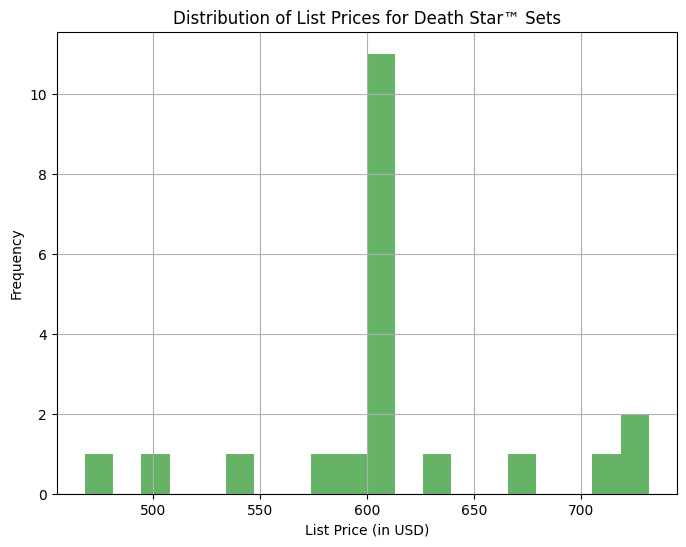

In [17]:
ds = lego[lego['set_name'] == 'Death Star™']

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(ds['list_price'], bins=20, color='green', alpha=0.6)

ax.grid(True)

ax.set_xlabel('List Price (in USD)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of List Prices for Death Star™ Sets')

plt.show()

#Quelle: ChatGPT first i used my own code (from linear regression notebook) and then asked it to "beautify" it so
#that it is more pleasant to look at, it only added ax labels and a title as well as grid

In [15]:
np.random.seed(5)

lego_normal = np.random.normal(loc=ds["list_price"].mean(), scale=ds["list_price"].std(), size = 33)
lego_normal

array([640.09862291, 591.01694907, 766.57243927, 596.02480947,
       619.01793532, 712.64726913, 554.25088991, 574.44021582,
       623.97591687, 591.08053066, 536.22695791, 599.02627133,
       589.23962921, 650.41236092, 506.22074785, 567.5402573 ,
       685.24319095, 730.11927265, 515.98555617, 653.04259671,
       549.7136036 , 557.58059996, 556.62540648, 585.19160358,
       675.39305928, 657.33821047, 615.80987469, 588.95471615,
       612.25918835, 605.31619947, 662.46392996, 571.9015793 ,
       611.65631331])

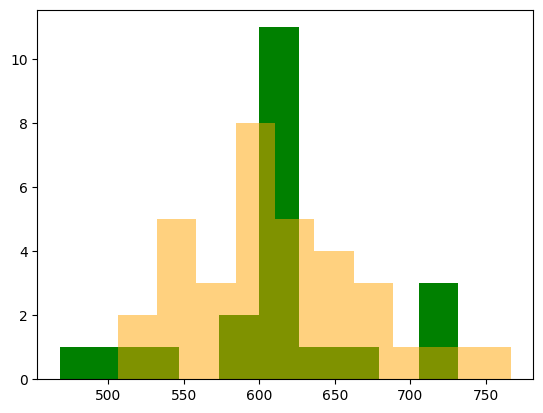

In [16]:
fig, ax = plt.subplots()
ax.hist(ds["list_price"], color="green")
ax.hist(lego_normal, color="orange", alpha=0.5)
plt.show()

Statistische Informationen:
count     21.000000
mean     612.050119
std       63.569258
min      467.992200
25%      607.992400
50%      609.987800
75%      609.987800
max      731.939000
Name: list_price, dtype: float64


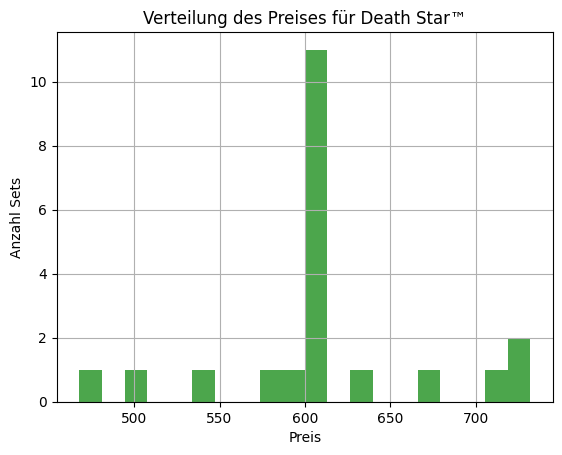

In [18]:

dsd = lego[lego['set_name'] == 'Death Star™']
pd = dsd['list_price']

print("Statistische Informationen:")
print(pd.describe())

plt.hist(pd, bins=20, color='green', alpha=0.7)
plt.xlabel('Preis')
plt.ylabel('Anzahl Sets')
plt.title('Verteilung des Preises für Death Star™')
plt.grid()
plt.show()


Die Ergebnisse zeigen, dass die meisten "Death Star™" LEGO Sets Preise nahe dem Durchschnitt haben, mit einer relativ geringen Standardabweichung. Es gibt jedoch auch Datensätze mit niedrigeren und höheren Preisen, wobei der teuerste Satz etwa 732 Einheiten kostet. Die Verteilung scheint relativ konzentriert zu sein, was durch die geringe Standardabweichung bestätigt wird. (Quelle: Chat GPT: Prompt: Bereitstellung der statistischen Informationen)

# 3) Lineares Modell

Für die Vorhersage von Setpreisen haben wir Ihnen einen zweiten Datensatz vorbereitet "lego_sets_clean.csv". In diesem wurden bereits eine Reihe von "PreProcessing-Schritte" durchgeführt, damit wir eine Lineare Regression durführen können
- Aufteilen der features "ages" in min_age und max_age als numerische features
- Löschen der "missing values" (non null values)
- Umwandlung der "review_difficulty" feature auf eine Fünfer-Skala von 1-5
- Löschen irrelevanter Variablen für die Regression
- Umwandeln der objects "theme_name" und "country" in dummies

Wir werden die Pre-processing Schritte bei Besprechung des Assignments zusammendurchgehen. Zum jetzigen Verständnis ist erstmal nur relevant, dass "objects" in Pandas in Dummy-Variablen umgewandelt wurden, die ausschliesslich den Wert 0 oder 1 annehmen können. Das Feature "theme_name_classic" nimmt für ein bestimmtes Lego-Set den Wert 1 an, wenn es zum Theme "Classic" gehört und 0, wenn es nicht zum Theme Classic gehört. Wir werden dies aber auch nochmal im Kurs in Modul 3 besprechen am 11.10 (vor Abgabe des Assignments 1 besprechen).

## 3a) Lesen Sie den Datensatz "lego_sets_clean.csv" ein

In [19]:
import pandas as pd
legocl = pd.read_csv("/content/lego_sets_clean.csv")
legocl.head()

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,max_age,theme_name_Angry Birds™,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,29.99,2,277,4.0,2,4.5,4.0,6,12,1,...,0,0,0,0,0,0,0,0,0,1
1,19.99,2,168,4.0,1,5.0,4.0,6,12,1,...,0,0,0,0,0,0,0,0,0,1
2,12.99,11,74,4.3,1,4.3,4.1,6,12,1,...,0,0,0,0,0,0,0,0,0,1
3,99.99,23,1032,3.6,2,4.6,4.3,12,99,0,...,0,0,0,0,0,0,0,0,0,1
4,79.99,14,744,3.2,3,4.6,4.1,12,99,0,...,0,0,0,0,0,0,0,0,0,1


## 3b) Erstellen Sie einen Trainings- und einen Testdatensatz. Der Testdatensatz soll die ersten 7000 Instanzen umfassen. Welche Schwierigkeiten könnten bei dieser Aufteilung auftreten?

In [20]:
train = legocl.iloc[:7000, :]
test = legocl.iloc[7000:, :]

Da wir einfach die ersten 7000 Instanzen verwenden und nicht einfach 7000 zufällige, könnte es sein, dass das Model "biased" ist, da diese ersten 7000 Instanzen eventuell nicht represäntativ sind für den gesamten Datenssatz. Ein weiteres Porblem könnte "Overfitting" sein und sich das Modell zu stark an zufällige "Auffälligkeiten" in den Daten anpasst. Man könnte deshalb alternativ die train-test-split Funktion verwenden um diese Probleme zu umgehen.

## 3c) Erstellen Sie ein lineares Modell und trainieren Sie es zur Vorhersage des Preises. Lassen Sie sich den Summary Report ausgeben.

In [21]:
column_names = legocl.columns
column_names_list = column_names.tolist()

print("Column Names:")
print(column_names_list)

Column Names:
['list_price', 'num_reviews', 'piece_count', 'play_star_rating', 'review_difficulty', 'star_rating', 'val_star_rating', 'min_age', 'max_age', 'theme_name_Angry Birds™', 'theme_name_Architecture', 'theme_name_BOOST', 'theme_name_BrickHeadz', 'theme_name_Carnotaurus Gyrosphere Escape', 'theme_name_City', 'theme_name_Classic', 'theme_name_Creator 3-in-1', 'theme_name_Creator Expert', 'theme_name_DC Comics™ Super Heroes', 'theme_name_DC Super Hero Girls', 'theme_name_DIMENSIONS™', 'theme_name_DUPLO®', 'theme_name_Dilophosaurus Outpost Attack', 'theme_name_Disney™', 'theme_name_Elves', 'theme_name_Friends', 'theme_name_Ghostbusters™', 'theme_name_Ideas', 'theme_name_Indoraptor Rampage at Lockwood Estate', 'theme_name_Juniors', 'theme_name_Jurassic Park Velociraptor Chase', 'theme_name_LEGO® Creator 3-in-1', 'theme_name_MINDSTORMS®', 'theme_name_Marvel Super Heroes', 'theme_name_Minecraft™', 'theme_name_Minifigures', 'theme_name_NEXO KNIGHTS™', 'theme_name_NINJAGO®', 'theme_nam

In [22]:
import statsmodels.api as sm

selected_columns = [
    'num_reviews', 'piece_count', 'play_star_rating', 'review_difficulty',
    'star_rating', 'val_star_rating', 'min_age', 'max_age',
    'theme_name_Angry Birds™', 'theme_name_Architecture', 'theme_name_BOOST',
    'theme_name_BrickHeadz', 'theme_name_Carnotaurus Gyrosphere Escape',
    'theme_name_City', 'theme_name_Classic', 'theme_name_Creator 3-in-1',
    'theme_name_Creator Expert', 'theme_name_DC Comics™ Super Heroes',
    'theme_name_DC Super Hero Girls', 'theme_name_DIMENSIONS™', 'theme_name_DUPLO®',
    'theme_name_Dilophosaurus Outpost Attack', 'theme_name_Disney™', 'theme_name_Elves',
    'theme_name_Friends', 'theme_name_Ghostbusters™', 'theme_name_Ideas',
    'theme_name_Indoraptor Rampage at Lockwood Estate', 'theme_name_Juniors',
    'theme_name_Jurassic Park Velociraptor Chase', 'theme_name_LEGO® Creator 3-in-1',
    'theme_name_MINDSTORMS®', 'theme_name_Marvel Super Heroes', 'theme_name_Minecraft™',
    'theme_name_Minifigures', 'theme_name_NEXO KNIGHTS™', 'theme_name_NINJAGO®',
    'theme_name_Power Functions', 'theme_name_Pteranodon Chase', 'theme_name_SERIOUS PLAY®',
    'theme_name_Speed Champions', 'theme_name_Star Wars™', 'theme_name_Stygimoloch Breakout',
    'theme_name_THE LEGO® BATMAN MOVIE', 'theme_name_THE LEGO® NINJAGO® MOVIE™', 'theme_name_Technic',
    'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_CZ', 'country_DE',
    'country_DN', 'country_ES', 'country_FI', 'country_FR', 'country_GB', 'country_IE', 'country_IT',
    'country_LU', 'country_NL', 'country_NO', 'country_NZ', 'country_PL', 'country_PT', 'country_US'
]

X = train[selected_columns]

y = train["list_price"]


In [23]:
X = sm.add_constant(X)
X.head() # wir generieren ein featrue das überall den Wert 1 hat also quasi das beta zero
linmodel = sm.OLS(y, X)
linmodel = linmodel.fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     714.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        07:41:49   Log-Likelihood:                -35015.
No. Observations:                7000   AIC:                         7.015e+04
Df Residuals:                    6940   BIC:                         7.056e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               12.4450      4.905      2.537      0.011       2.830      22.060
num_reviews                                          0.1031      0.018      5.858      0.000       0.069       0.138
piece_count                                          0.0846      0.001     83.522      0.000       0.083       0.087
play_star_rating                                     7.3105      1.090      6.709      0.000       5.174       9.446
review_difficulty                                    8.8469      0.744     11.896      0.000       7.389      10.305
star_rating                                         -2.4094      1.493     -1.614      0.107      -5.336       0.518
val_star_rating                                    -12.8156      1.039    -12.338      0.000     -14.852     -10.779
min_age                                              4.2013      0.603      6.971      0.000       3.020       5.383
max_age                                              0.1032      0.036      2.829      0.005       0.032       0.175
theme_name_Angry Birds™                             -2.1938     14.451     -0.152      0.879     -30.523      26.135
theme_name_Architecture                            -41.3469      4.056    -10.193      0.000     -49.299     -33.395
theme_name_BOOST                                    78.9224      9.604      8.218      0.000      60.096      97.749
theme_name_BrickHeadz                              -27.1789      3.270     -8.312      0.000     -33.589     -20.769
theme_name_Carnotaurus Gyrosphere Escape            17.1098     11.836      1.446      0.148      -6.092      40.312
theme_name_City                                      4.7154      1.872      2.519      0.012       1.046       8.385
theme_name_Classic                                 -12.1104      4.474     -2.707      0.007     -20.880      -3.341
theme_name_Creator 3-in-1                          -17.5126      2.576     -6.799      0.000     -22.562     -12.463
theme_name_Creator Expert                         -108.5999      3.857    -28.160      0.000    -116.160    -101.040
theme_name_DC Comics™ Super Heroes                  -3.3654      3.619     -0.930      0.352     -10.459       3.728
theme_name_DC Super Hero Girls                      -7.8969      7.359     -1.073      0.283     -22.322       6.528
theme_name_DIMENSIONS™                               1.6513      2.732      0.604      0.546      -3.704       7.007
theme_name_DUPLO®                                   42.2348      3.328     12.691      0.000      35.711      48.758
theme_name_Dilophosaurus Outpost Attack              3.0893      9.560      0.323      0.747     -15.651      21.829
theme_name_Disney™                       

## 3d) Welchen Einfluss hat die Anzahl der Legosteine in einem Set auf den Preis? Ist dieser Signifikant? Was ist der marginale Umsatz pro zusätzlichem Legostein in einem Set?

In [26]:
y = train["list_price"]
X = sm.add_constant(X)
X.head()
linmodel2 = sm.OLS(y, X)
linmodel2 = linmodel2.fit()
print(linmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     714.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        07:49:41   Log-Likelihood:                -35015.
No. Observations:                7000   AIC:                         7.015e+04
Df Residuals:                    6940   BIC:                         7.056e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Wir sehen einen relativ hohen R2-Wert, es kann 85.9% der Varianz im Preis der Legos durch die anderen features erklärt werden.
Der p-Wert der Legosteine ist sehr nahe null (und unter 0.05), es kann also eine Signifikanz festgestellt werden.
Für jedes zusätzliche Legosteinchen steigt der geschätzte Umsatz um etwa 0.0846 $.

(Quelle: Data Analytics 2 Unterlagen)

# 4) Preisvorhersage

## 4a) Sagen Sie die Preise für die Testdaten voraus. Wie hoch ist der RMSE?

In [28]:

X_test_model2 = test[selected_columns]
X_test_model2 = sm.add_constant(X_test_model2)
y_pred_model2 = linmodel2.predict(X_test_model2)


from sklearn.metrics import mean_squared_error
import numpy as np

rmse_model2 = np.sqrt(mean_squared_error(test["list_price"], y_pred_model2))

print("RMSE for Model 2:", rmse_model2)



RMSE for Model 2: 40.2610938558856


Quelle: ChatGPT, Prompt: vorherige codes und 4a) Fragestellung

## 4b) Interpretieren Sie den RSME. Was sagt dieser eigentlich genau aus? Wie steht dieser in Relation zum mittleren Preis?

In [28]:
mittelwert_preis = legocl["list_price"].mean()
print("Mittlerer Preis:", mittelwert_preis)


Mittlerer Preis: 71.444905422161



RMSE ist die Erweiterung zum MSE, indem man noch die Wurzel des MSE zieht, wir erhalten also ein positives Resultat und je kleiner diese Werte sind umso besser, da dann der Fehler kleiner und die Prediction genauer.
Wenn wir ein lineares Modell haben und dann die Differenzen oder Fehler der y-Werten der Daten und jenen y-Werten der Prediction messen, diese alle quadrieren und dann die Wurzel dessen ziehen erhalten wir den RMSE.
(Quelle: https://www.jedox.com/de/blog/fehlermasze-guete-von-forecasts-ermitteln/#rmse)

Der Mittlere Preis oder Durchschnittspreis ist in diesem Fall: 71.444905422161.

  - Modell 2 hat einen RMSE, der kleiner ist als der Mittelwert. Dies deutet darauf hin, dass die Vorhersagen von Modell 2 im Durchschnitt näher an den tatsächlichen Preisen liegen und tendenziell genauer sind.

In diesem Kontext würde Modell 2  als genau angesehen werden, da sein RMSE kleiner ist als der Mittelwert der Preise.

Allerdings sollte beachtet werden, dass der RMSE alleine nicht verwendet werden sollte um Aussagen über die Genauigkeit eines Modells zu machen! Es sollten definitiv noch weitere Metriken und Faktoren dafür miteinbezogen werden-

(Quelle: ChatGPT, Prompt: die beiden Metriken und Fragestellung)